<h1>Data Loading</h1>

In [1]:
import pandas as pd

In [2]:
dataset_path = r"D:\Universite\Term8\Data Science\Data-Science-Course-spring2025\CA-4\task1\matches.csv"
df = pd.read_csv(dataset_path)

<h1>EDA<h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            17812 non-null  int64  
 1   home_team             17812 non-null  object 
 2   home_goals            17812 non-null  int64  
 3   away_goals            17812 non-null  int64  
 4   away_team             17812 non-null  object 
 5   wcm                   17812 non-null  int64  
 6   dif_inter_match       17812 non-null  float64
 7   dif_inter_match_won   17812 non-null  float64
 8   dif_inter_match_lost  17812 non-null  float64
 9   dif_inter_match_tie   17812 non-null  float64
 10  dif_inter_goals_sco   17812 non-null  float64
 11  dif_inter_goals_con   17812 non-null  float64
 12  dif_wc_match          17812 non-null  float64
 13  dif_wc_match_won      17812 non-null  float64
 14  dif_wc_match_lost     17812 non-null  float64
 15  dif_wc_match_tied  

In [4]:
df.head(5)

,Unnamed: 0,home_team,home_goals,away_goals,away_team,wcm,dif_inter_match,dif_inter_match_won,dif_inter_match_lost,dif_inter_match_tie,dif_inter_goals_sco,dif_inter_goals_con,dif_wc_match,dif_wc_match_won,dif_wc_match_lost,dif_wc_match_tied,dif_wc_goals_sco,dif_wc_goals_con,status
0,0,Spain,1,0,Czechoslovakia,0,488.0,315.0,60.0,113.0,1061.0,346.0,33.0,19.0,4.0,10.0,55.0,27.0,1
1,1,Portugal,1,0,Czechoslovakia,0,438.0,222.0,113.0,103.0,748.0,466.0,0.0,3.0,-4.0,1.0,5.0,-10.0,1
2,2,Northern Ireland,7,0,Wales,0,-373.0,-164.0,-136.0,-73.0,-544.0,-409.0,8.0,2.0,4.0,2.0,9.0,19.0,1
3,3,Italy,4,2,Switzerland,0,-438.0,-120.0,-259.0,-59.0,-595.0,-936.0,46.0,33.0,0.0,13.0,78.0,13.0,1
4,4,Portugal,2,0,France,0,-191.0,-101.0,-61.0,-29.0,-388.0,-353.0,-36.0,-20.0,-9.0,-7.0,-71.0,-42.0,1


In [5]:
df.isnull().any()

Unnamed: 0              False
home_team               False
home_goals              False
away_goals              False
away_team               False
wcm                     False
dif_inter_match         False
dif_inter_match_won     False
dif_inter_match_lost    False
dif_inter_match_tie     False
dif_inter_goals_sco     False
dif_inter_goals_con     False
dif_wc_match            False
dif_wc_match_won        False
dif_wc_match_lost       False
dif_wc_match_tied       False
dif_wc_goals_sco        False
dif_wc_goals_con        False
status                  False
dtype: bool

In [6]:
counts = df['status'].value_counts()
total = 17812

percentage_1 = (counts.get(1, 0) / total) * 100
percentage_2 = (counts.get(2, 0) / total) * 100
percentage_3 = (counts.get(3, 0) / total) * 100

percentage_1, percentage_2, percentage_3


(48.69750729845048, 23.641365371659557, 27.66112732988996)

This outcome indicates that the classes are imbalanced and the density of classes that the **home team** won, was almost twice as more than the others

In [7]:
numerical_features = ['home_goals', 'away_goals', 'dif_inter_match', 'dif_inter_match_won', 'dif_inter_match_lost', 
                     'dif_inter_match_tie', 'dif_inter_goals_sco', 'dif_inter_goals_con',
                     'dif_wc_match', 'dif_wc_match_won', 'dif_wc_match_lost',
                     'dif_wc_match_tied', 'dif_wc_goals_sco', 'dif_wc_goals_con', 'wcm']

df[numerical_features].describe()

,home_goals,away_goals,dif_inter_match,dif_inter_match_won,dif_inter_match_lost,dif_inter_match_tie,dif_inter_goals_sco,dif_inter_goals_con,dif_wc_match,dif_wc_match_won,dif_wc_match_lost,dif_wc_match_tied,dif_wc_goals_sco,dif_wc_goals_con,wcm
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,1.700539,1.137042,39.204188,24.746407,6.269313,8.188468,85.072086,33.321244,2.777453,1.452897,0.777229,0.547328,4.748484,3.414384,0.050528
std,1.668345,1.293980,494.412966,285.691530,118.601085,117.721027,1007.169084,507.832099,38.148515,23.118338,10.581737,7.992631,73.904763,44.639966,0.219037
min,0.000000,0.000000,-966.000000,-578.000000,-331.000000,-233.000000,-2186.000000,-1296.000000,-109.000000,-73.000000,-27.000000,-21.000000,-229.000000,-125.000000,0.000000
25%,1.000000,0.000000,-458.000000,-242.000000,-95.000000,-107.000000,-818.000000,-412.000000,-18.000000,-6.000000,-7.000000,-5.000000,-25.000000,-26.000000,0.000000
50%,1.000000,1.000000,62.000000,60.000000,13.000000,14.000000,213.000000,79.000000,3.000000,1.000000,1.000000,1.000000,2.000000,4.000000,0.000000
75%,2.000000,2.000000,503.000000,268.000000,106.000000,117.000000,928.000000,463.000000,24.000000,9.000000,9.000000,5.000000,34.000000,32.000000,0.000000
max,31.000000,17.000000,966.000000,578.000000,329.000000,236.000000,2186.000000,1288.000000,109.000000,73.000000,27.000000,21.000000,229.000000,125.000000,1.000000


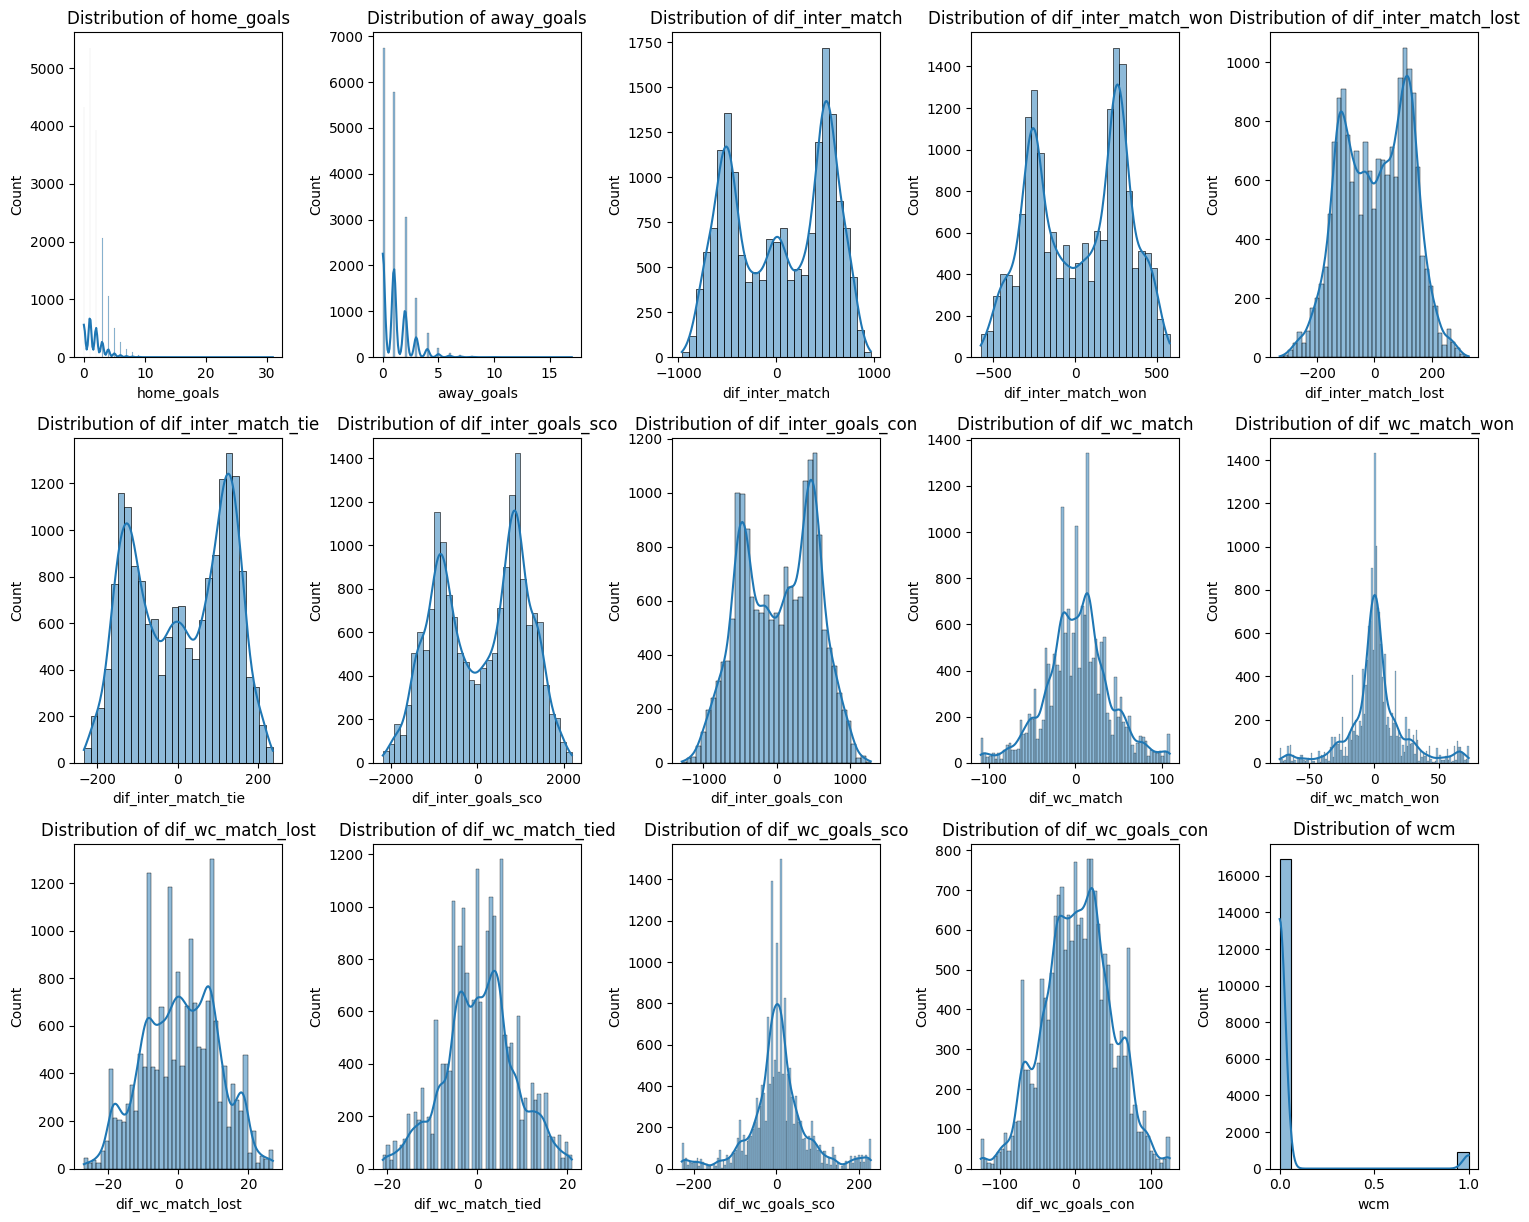

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 5, i+1)
    sns.histplot(data = df, x = col, kde = True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

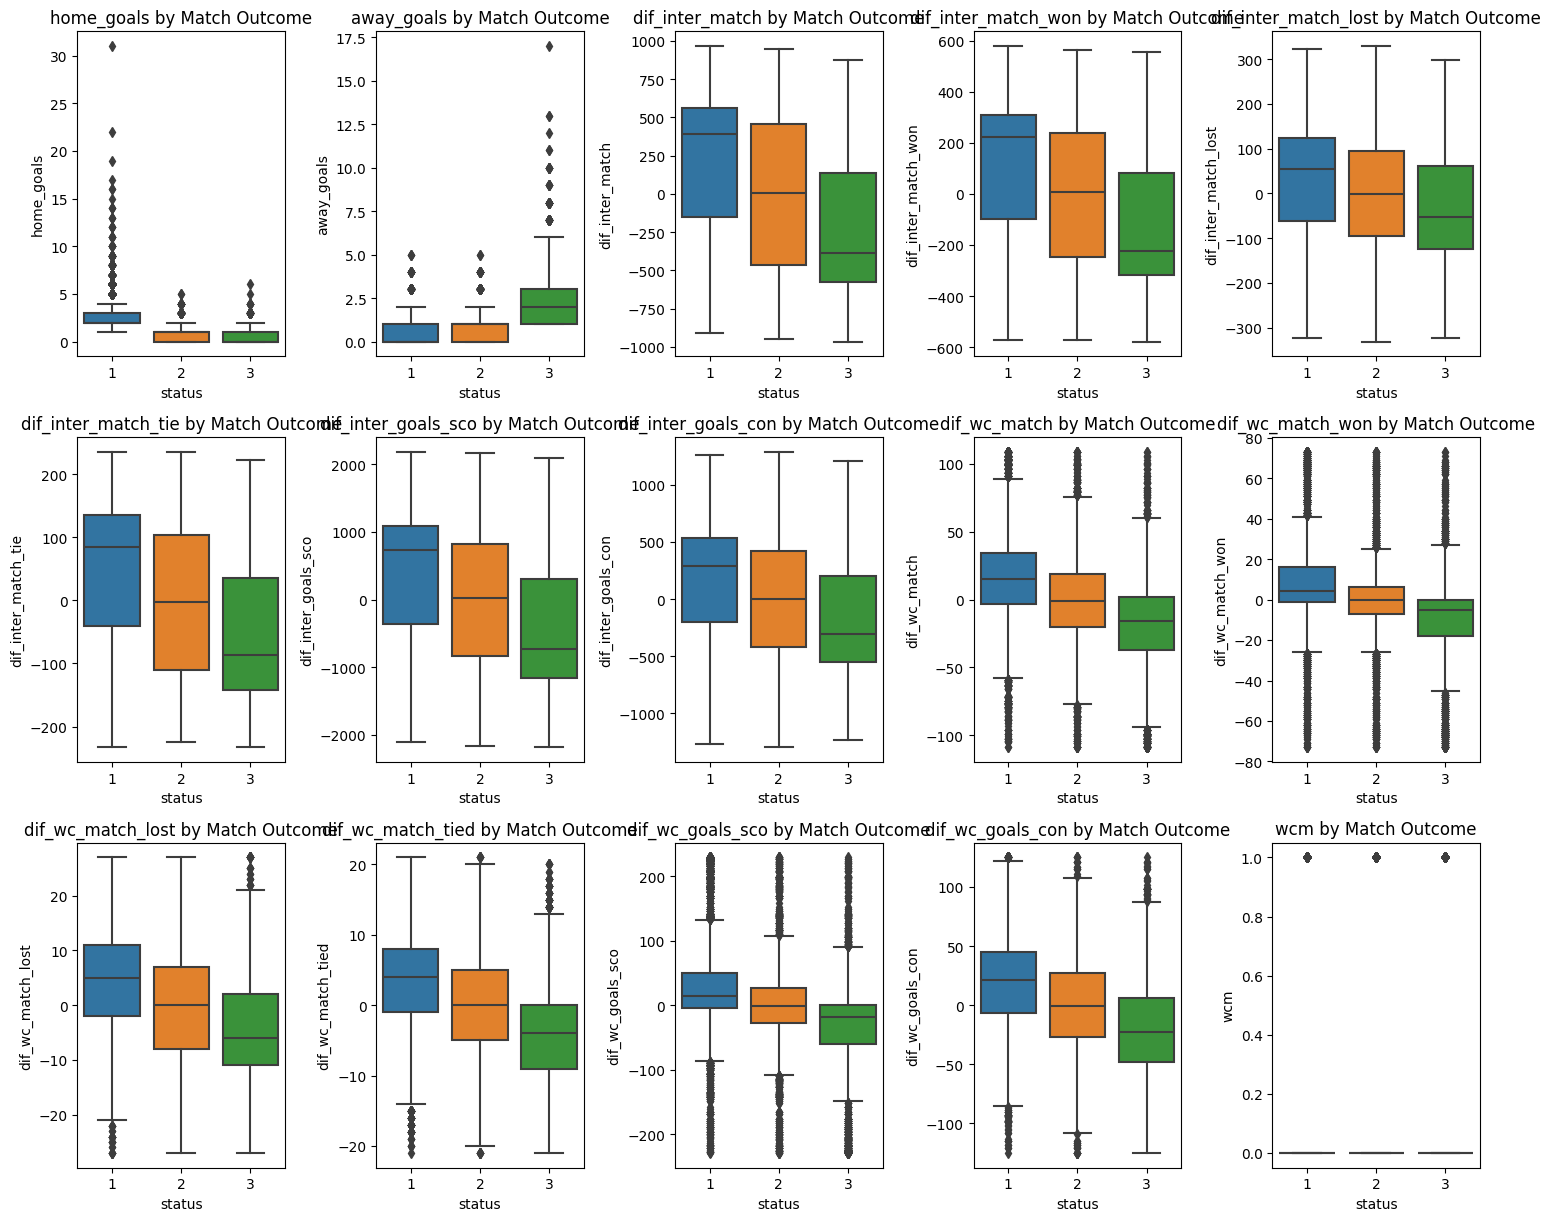

In [9]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 5, i+1)
    sns.boxplot(data=df, x='status', y=col)
    plt.title(f'{col} by Match Outcome')
plt.tight_layout()
plt.show()

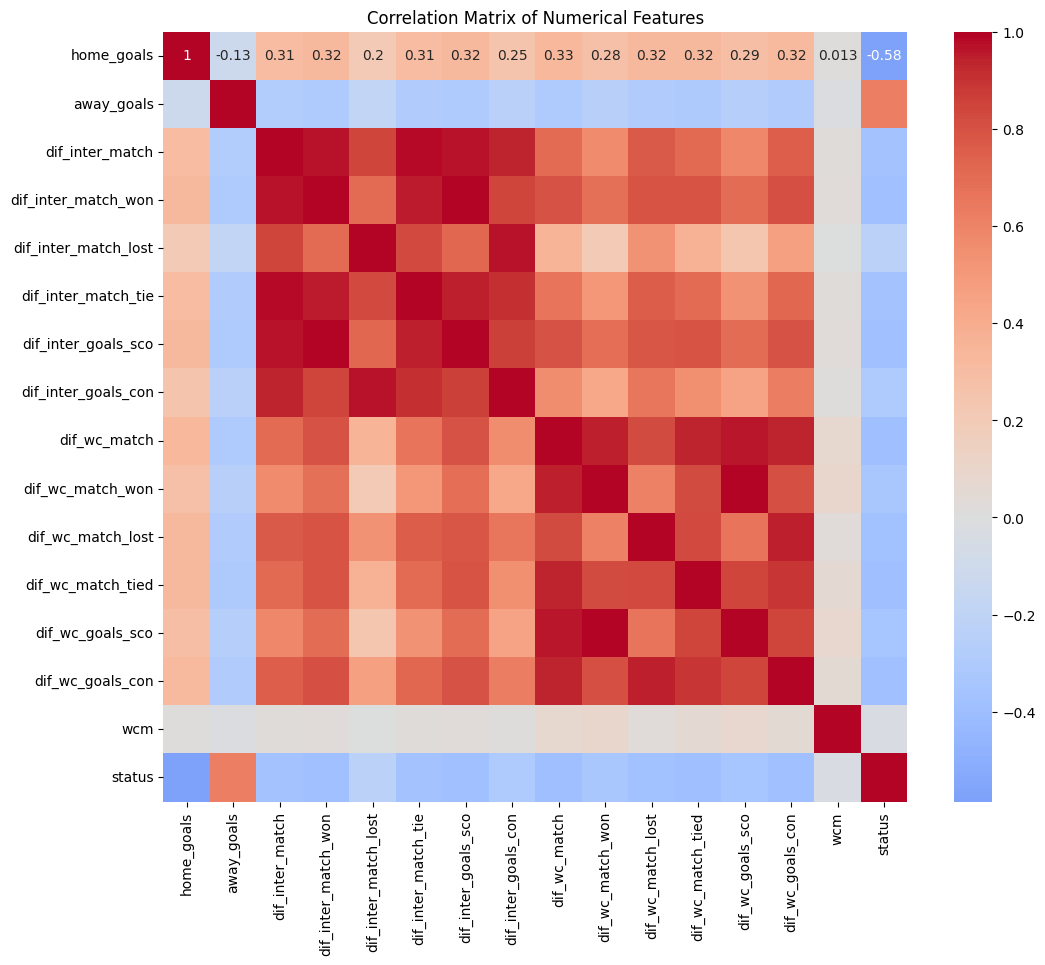

In [10]:
corr_matrix = df[numerical_features + ['status']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Team-Specific Home/Away Performance

In [11]:
df_analysis = df.copy()
mapping = {1: 'Home Win', 2: 'Tie', 3 : 'Away Win'}
df_analysis['outcome'] = df_analysis['status'].map(mapping)


Performance for Spain:
          Home Games  Away_Games
Home Win   67.934783   24.260355
Tie        18.478261   29.289941
Away Win   13.586957   46.449704


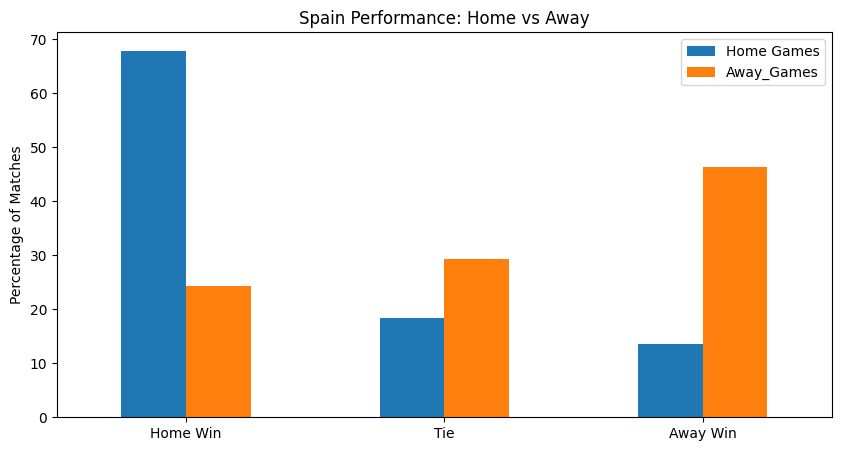


Performance for Portugal:
          Home Games  Away_Games
Home Win   58.579882   22.260274
Tie        24.260355   38.698630
Away Win   17.159763   39.041096


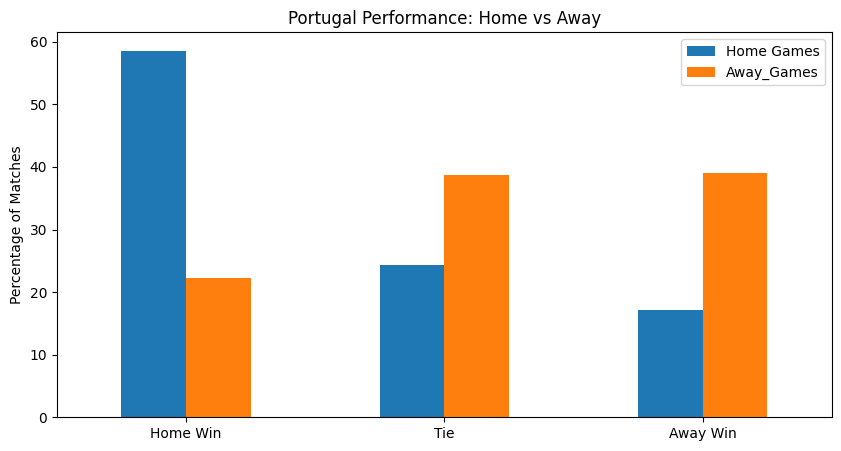


Performance for Italy:
          Home Games  Away_Games
Home Win   58.796296   30.601093
Tie        27.314815   32.240437
Away Win   13.888889   37.158470


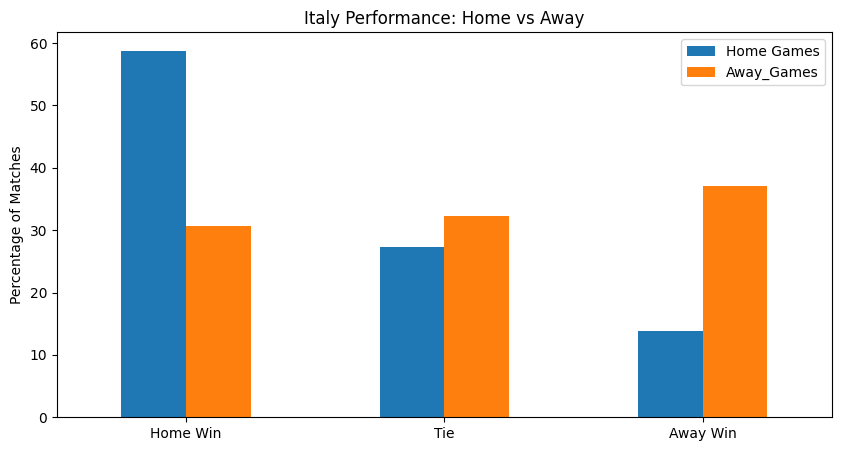

In [12]:
def team_performance(team_name):
    home_matches = df_analysis[df_analysis['home_team'] == team_name]
    away_matches = df_analysis[df_analysis['away_team'] == team_name]
    
    home_results = home_matches['outcome'].value_counts(normalize = True).mul(100)
    away_results = away_matches['outcome'].value_counts(normalize = True).mul(100)
    
    home_results = home_results.reindex(['Home Win', 'Tie', 'Away Win'], fill_value=0)
    away_results.index = ['Away Win', 'Tie', 'Home Win']  
    away_results = away_results.reindex(['Home Win', 'Tie', 'Away Win'], fill_value=0)
    
    comparison = pd.DataFrame({
        'Home Games' : home_results,
        'Away_Games': away_results
    })
    
    return comparison

selected_teams = ['Spain', 'Portugal', 'Italy']
for team in selected_teams:
    print(f"\nPerformance for {team}:")
    print(team_performance(team))
    
    team_data = team_performance(team)
    team_data.plot(kind='bar', figsize=(10, 5))
    plt.title(f'{team} Performance: Home vs Away')
    plt.ylabel('Percentage of Matches')
    plt.xticks(rotation=0)
    plt.show()
    

Gaussian-like distributions → Good candidates for standardization

Skewed distributions → May need normalization or transformation first

Bounded features (e.g., between -X and X) → May work fine without scaling

In [13]:
standardized_cols = [ 'dif_wc_match', 'dif_wc_match_tied', 'dif_wc_goals_con', 
    'dif_wc_goals_sco', 'dif_inter_goals_sco', 'dif_inter_goals_con']

In [14]:
normalize_cols = [
    'home_goals', 'away_goals',
    'dif_wc_match_won', 'dif_wc_match_lost',
    'dif_inter_match_won', 'dif_inter_match_lost',
    'dif_inter_match_tie'
]

<h1>Data Preparation</h1>

In [15]:
df_for_train = df.copy()
df_for_train = df_for_train[df_for_train['wcm'] == 0]
X = df_for_train.drop(columns=['status', 'home_team', 'away_team',
                               'home_goals', 'away_goals'])

y = df_for_train['status']

In [16]:
import numpy as np
import torch
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float)
print("Class weights:", class_weights)

c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Class weights: tensor([0.6899, 1.4051, 1.1921])


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
numerical_features = ['dif_inter_match', 'dif_inter_match_won', 'dif_inter_match_lost', 
                     'dif_inter_match_tie', 'dif_inter_goals_sco', 'dif_inter_goals_con',
                     'dif_wc_match', 'dif_wc_match_won', 'dif_wc_match_lost',
                     'dif_wc_match_tied', 'dif_wc_goals_sco', 'dif_wc_goals_con', 'wcm']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

Converting to Pytorch Tensors

In [20]:
X_train_array = X_train_scaled.values.astype(np.float32)
X_test_array = X_test_scaled.values.astype(np.float32)

X_train_tensor = torch.tensor(X_train_array)
X_test_tensor = torch.tensor(X_test_array)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).reshape(-1, 1)

y_train_tensor = y_train_tensor - 1
y_test_tensor = y_test_tensor - 1

print("\nTensor shapes:")
print(f"X_train: {X_train_tensor.shape}, y_train: {y_train_tensor.shape}")
print(f"X_test: {X_test_tensor.shape}, y_test: {y_test_tensor.shape}")



Tensor shapes:
X_train: torch.Size([11838, 14]), y_train: torch.Size([11838, 1])
X_test: torch.Size([5074, 14]), y_test: torch.Size([5074, 1])


<h1>Model Definition</h1>

In [21]:
import torch.nn as nn
import torch.nn.functional as F
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  
        return x

<h1>Model Training</h1>

In [22]:
from torch.utils.data import TensorDataset, DataLoader

if len(y_train_tensor.shape) > 1:
    y_train_tensor = y_train_tensor.squeeze()
if len(y_test_tensor.shape) > 1:
    y_test_tensor = y_test_tensor.squeeze()
    
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=32)

In [35]:

input_dim = X_train_tensor.shape[1]
hidden_dim = (64, 32)
output_dim = 3
model = MLPModel(input_size=input_dim, hidden_size = hidden_dim, output_size =
                 output_dim)

if torch.cuda.is_available():
    print("found cuda device")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss(weight = class_weights.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 5)


In [36]:
def train_model(model, train_loader, val_loader, epochs=20):
    best_val_loss = float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
           
            labels = labels.long()
            
            optimizer.zero_grad()
            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        train_loss /= len(train_loader)
        train_acc = 100 * correct / total
        
        
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device).long()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total
        
        scheduler.step(val_loss)
        
        print(f'Epoch {epoch+1}/{epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
    
    print('Training complete')
    return model

In [37]:
train_model(model, train_loader, val_loader, epochs=20)


Epoch 1/20: Train Loss: 14.6856, Train Acc: 27.83% | Val Loss: 1.1010, Val Acc: 23.73%
Epoch 2/20: Train Loss: 1.2075, Train Acc: 24.13% | Val Loss: 1.0987, Val Acc: 23.75%
Epoch 3/20: Train Loss: 1.1458, Train Acc: 43.06% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 4/20: Train Loss: 1.1142, Train Acc: 47.37% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 5/20: Train Loss: 1.1095, Train Acc: 47.63% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 6/20: Train Loss: 1.1085, Train Acc: 43.71% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 7/20: Train Loss: 1.1163, Train Acc: 48.23% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 8/20: Train Loss: 1.1052, Train Acc: 48.22% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 9/20: Train Loss: 1.1009, Train Acc: 48.24% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 10/20: Train Loss: 1.1010, Train Acc: 48.27% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 11/20: Train Loss: 1.1025, Train Acc: 48.24% | Val Loss: 1.0985, Val Acc: 48.31%
Epoch 12/20: Train Loss: 1.1026, Train Acc: 48.24% 

MLPModel(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [38]:
df_for_test = df.copy()
df_for_test = df_for_test[df_for_test['wcm'] == 1]

X_test_for_test = df_for_test.drop(columns=['status', 'home_team', 'away_team', 'home_goals', 'away_goals'])
y_test_for_test = df_for_test['status']

In [39]:
X_test_for_test_scaled = X_test_for_test.copy()
X_test_for_test_scaled[numerical_features] = scaler.transform(X_test_for_test[numerical_features])

In [40]:
X_test_final_array = X_test_for_test_scaled.values.astype(np.float32)
y_test_final_array = y_test_for_test.values.astype(np.int64) - 1  

X_test_final_tensor = torch.tensor(X_test_final_array)
y_test_final_tensor = torch.tensor(y_test_final_array)

final_test_dataset = TensorDataset(X_test_final_tensor, y_test_final_tensor)
final_test_loader = DataLoader(final_test_dataset, batch_size=32)


In [41]:
best_model = MLPModel(input_size=input_dim, hidden_size=hidden_dim, output_size=output_dim)
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.to(device)
best_model.eval()


MLPModel(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [45]:
from sklearn.metrics import classification_report, accuracy_score

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in final_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=['Home Win', 'Tie', 'Away Win']))

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Classification Report:
              precision    recall  f1-score   support

    Home Win       0.56      1.00      0.72       503
         Tie       0.00      0.00      0.00       199
    Away Win       0.00      0.00      0.00       198

    accuracy                           0.56       900
   macro avg       0.19      0.33      0.24       900
weighted avg       0.31      0.56      0.40       900

Test Accuracy: 55.89%


c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r